In [3]:
import SimpleITK as sitk
import os
import numpy
import SimpleITK
import matplotlib.pyplot as plt
%pylab inline
import imageio
import scipy.ndimage as ndi

Populating the interactive namespace from numpy and matplotlib


In [4]:
mr1 = imageio.imread('mri.dcm')

In [6]:
mr1.meta['Modality']

'MR'

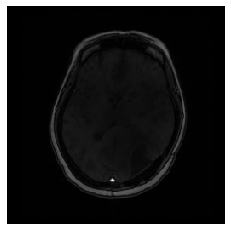

In [7]:
plt.imshow(mr1, cmap='gray')
plt.axis('off')
plt.show()

In [8]:
mr1.shape

(256, 256)

In [9]:
mr2 = imageio.imread('mr2.dcm')

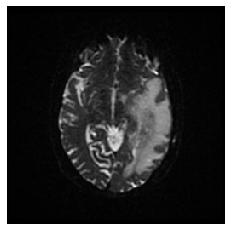

In [10]:
plt.imshow(mr2, cmap='gray')
plt.axis('off')
plt.show()

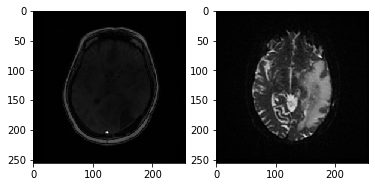

In [12]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(mr1,cmap='gray')
axes[1].imshow(mr2,cmap='gray')

In [16]:
com1 = ndi.center_of_mass(mr1)
com2 = ndi.center_of_mass(mr2)


In [17]:
com1

(131.35804801758948, 129.53991919297206)

In [18]:
com2

(133.036077653208, 132.8793026466766)

In [19]:
mr2.shape

(256, 256)

In [24]:
m1d0 = 128 - com1[0]
m1d1 = 128 - com1[1]
xfm1 = ndi.shift(mr1, shift=[m1d0, m1d1])

m2d0 = 128 - com2[0]
m2d1 = 128 - com2[1]
xfm2 = ndi.shift(mr2, shift=[m2d0, m2d1])

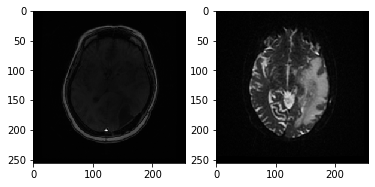

In [25]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(xfm2,cmap='gray')

In [26]:
com1 = ndi.center_of_mass(xfm1)
com2 = ndi.center_of_mass(xfm2)

In [27]:
com1, com2

((127.99452862832008, 128.00117614515207),
 (128.0004761519161, 128.04745229154935))

In [28]:
# mr-ct intra subject reg

In [34]:
ct = imageio.imread('ct.dcm')

In [35]:
ct.shape

(512, 512)

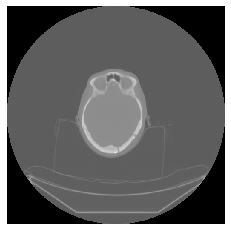

In [36]:
plt.imshow(ct, cmap='gray')
plt.axis('off')
plt.show()

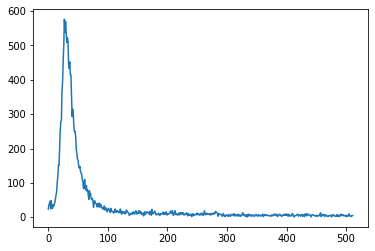

In [48]:
hist = ndi.histogram(ct, min=0,max=511,bins=512)

hist.shape
plt.plot(hist)
plt.show()

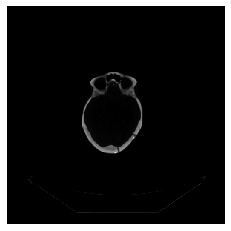

In [68]:
mask2 = ct>30
ct_mask = np.where(mask2, ct, 0)

plt.imshow(ct_mask, cmap='gray')
plt.axis('off')
plt.show()

In [82]:
com1 = ndi.center_of_mass(mr1)
com2 = ndi.center_of_mass(ct_mask)

m1d0 = 128 - com1[0]
m1d1 = 128 - com1[1]
xfm1 = ndi.shift(mr1, shift=[m1d0, m1d1])

ctd0 = 256 - com2[0]
ctd1 = 256 - com2[1]
xfm2 = ndi.shift(ct_mask, shift=[ctd0, ctd1])


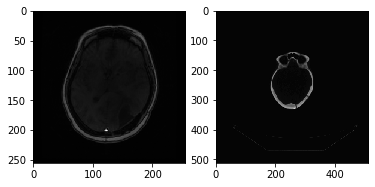

In [83]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(xfm2,cmap='gray')

In [131]:
mat = [[0.65, 0, 0],
[0, 0.65, 0],
[0, 0, 1]]

xfm3 = ndi.affine_transform(xfm2, mat)

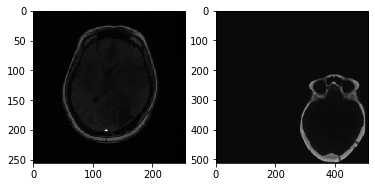

In [132]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(xfm3,cmap='gray')

In [133]:
xfm3.shape

(512, 512)

In [134]:
com_xfm3 = ndi.center_of_mass(xfm3)

In [135]:
com_xfm3

(380.42706969541416, 392.70274072796695)

In [136]:
xfmd0 = 256 - com_xfm3[0]
xfmd1 = 256 - com_xfm3[1]
xfm4 = ndi.shift(xfm3, shift=[xfmd0, xfmd1])

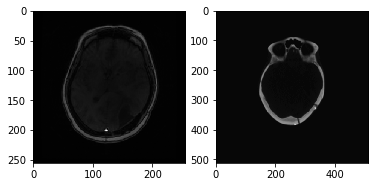

In [137]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(xfm4,cmap='gray')

In [140]:
mat = [[0.8, 0, 0],
[0, 0.8, 0],
[0, 0, 1]]

final = ndi.affine_transform(xfm4, mat)

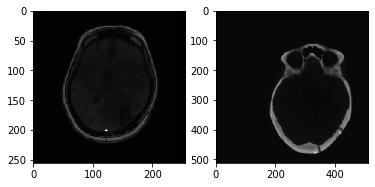

In [141]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(final,cmap='gray')

In [142]:
com_final = ndi.center_of_mass(final)

In [143]:
com_final

(319.9924090839603, 320.00005446416316)

In [144]:
finald0 = 256 - com_final[0]
finald1 = 256 - com_final[1]
fin = ndi.shift(final, shift=[finald0, finald1])

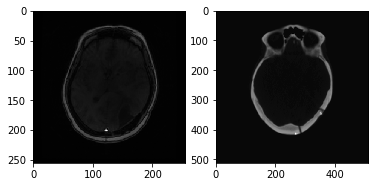

In [145]:
fig, axes = plt.subplots(nrows=1,
ncols=2)
axes[0].imshow(xfm1,cmap='gray')
axes[1].imshow(fin,cmap='gray')